In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import json


In [8]:
class Cycle():
  def __init__(self, points, edges):
    self.points = points
    self.edges = edges

class Instance():
  def __init__(self, name, cycle):
    self.name = name
    self.cycle = cycle

class Algorithm():
  def __init__(self, algorithm_type, instances):
    self.algorithm_type = algorithm_type
    self.instances = instances

f = open('../resultFiles/results_lab_2_cp.json')
 
data = json.load(f)


algorithms = []
for i in range(len(data['algorithm'])):
  algorithm_type = data['algorithm'][i]["type"]
  instances = []
  for j in range(len(data['algorithm'][i]['instance'])):
    name = data['algorithm'][i]['instance'][j]["name"]
    cycles = []
    for k in range(len(data['algorithm'][i]['instance'][j]["cycle"])):
      points = tuple(map(tuple, data['algorithm'][i]['instance'][j]["cycle"][k]["points"]))
      edges = tuple(map(tuple, data['algorithm'][i]['instance'][j]["cycle"][k]["edges"]))
      cycles.append(Cycle(points, edges))
    instances.append(Instance(name, cycles))
  algorithms.append(Algorithm(algorithm_type, instances))

f.close()

greedy
kroA100


AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

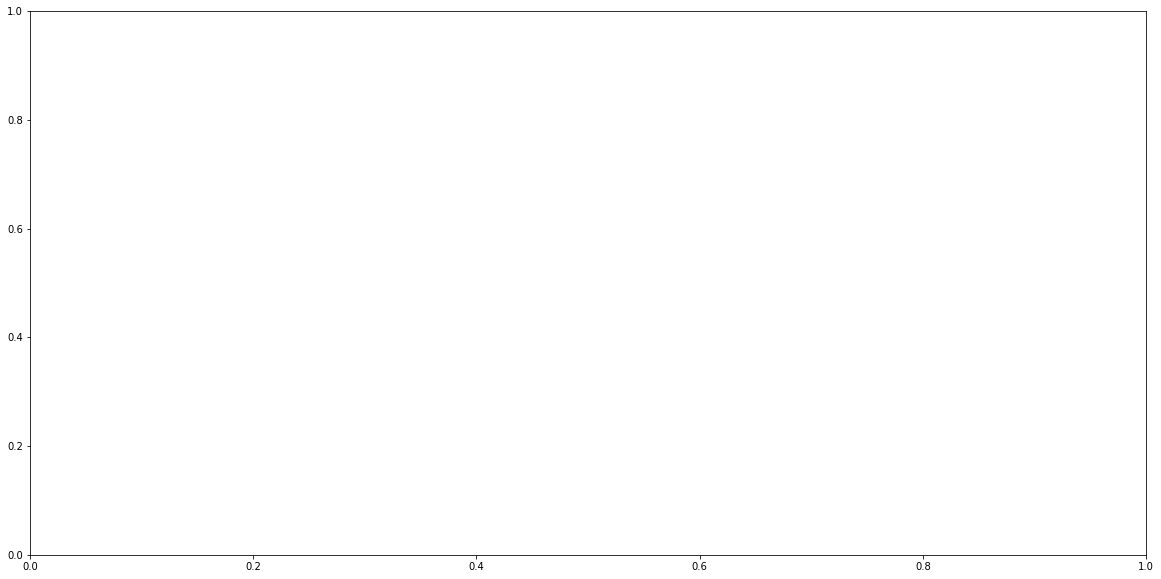

In [9]:
for i in range(0,len(algorithms)):
  print(algorithms[i].algorithm_type)
  algorithm_type = algorithms[i].algorithm_type
  for j in range(len(algorithms[i].instances)):
    print(algorithms[i].instances[j].name)
    name = algorithms[i].instances[j].name

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 10)
    
    for k in range(len(algorithms[i].instances[j].cycle)):
      points = algorithms[i].instances[j].cycle[k].points
      edges = algorithms[i].instances[j].cycle[k].edges
      G = nx.Graph()
      for e in edges:
        G.add_edge(points[e[0]], points[e[1]], weight=e[2])

      pos = {point: point for point in points}
      color_map = ['red' if k == 0 else 'green' for node in G]        
      nx.draw(G, pos, node_size=50, node_color=color_map, ax=ax)
      plt.axis("on")
      ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    plt.show()
    fig.savefig(algorithm_type + "_" + name + ".png", dpi=200)

